In [10]:
import numpy as np
import pandas as pd

%matplotlib inline

In [24]:
def make_data(shape=(1000,5),rand_range=(0,100),anom_len=250,anom_range=(500,510)):
    data = np.random.randint(rand_range[0],rand_range[1],size=shape)
    df = pd.DataFrame(data,columns=[f'col_{n}'for n in range(shape[1])])
    if anom_len > 0:
        df['is_anom'] = 0 
        data_anom = np.random.randint(anom_range[0],anom_range[1],size=(anom_len,shape[1]))
        df_anom = pd.DataFrame(data_anom,columns=[f'col_{n}'for n in range(shape[1])])
        df_anom['is_anom'] = 1
        df = df.append(df_anom)
    return df

make_data().shape

(1250, 6)

In [16]:
np.random.randint(rand_range[0],rand_range[1],size=(n_data,n_features))

array([[75, 41, 41, 12,  2],
       [75, 39, 57, 42, 22],
       [41, 21, 23, 92, 53],
       ...,
       [47, 11, 32, 95, 88],
       [96, 78, 94, 28,  7],
       [16, 24, 19, 54,  4]])

In [3]:
n_features = 5
n_samples_normal = 1000
n_samples_broken = 50

In [4]:
# generate some normal data
df_normal = pd.DataFrame(np.random.randint(0,100,size=(n_samples_normal, n_features)), columns = [f'col_{n+1}' for n in range(n_features)])
df_normal['rownum'] = np.arange(len(df_normal))
df_normal['label'] = 0

# generate some broken data
df_broken = pd.DataFrame(np.random.randint(0,1000,size=(n_samples_broken, n_features)), columns = [f'col_{n+1}' for n in range(n_features)])
df_broken['rownum'] = df_normal['rownum'].max() + np.arange(len(df_broken))
df_broken['label'] = 1

In [5]:
df = df_normal.append(df_broken)
df = df.set_index('rownum')
print(df.shape)
df.tail(100)

(1050, 6)


,col_1,col_2,col_3,col_4,col_5,label
rownum,,,,,,
950,25,87,30,13,31,0
951,13,36,60,59,49,0
952,63,41,83,61,58,0
953,96,91,81,61,86,0
954,17,6,53,56,18,0
...,...,...,...,...,...,...
1044,545,263,999,812,803,1
1045,380,341,197,468,63,1
1046,157,750,856,444,694,1


In [6]:
# save to file
df.to_csv('../data/dummy.csv',index=False)

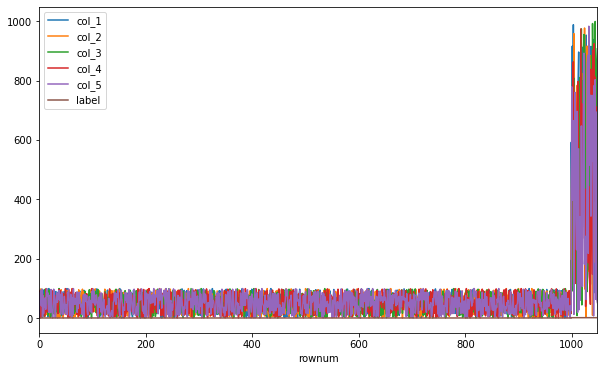

In [9]:
df.plot(figsize=(10,6))